<a href="https://colab.research.google.com/github/drishtigoel083/TedTalksPredictionModel/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Ted Talk Views Predication



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**            Drishti Goel


# **Project Summary -**

**Project Title:**

TED Talks Views Prediction Using Machine Learning


---



 **Project Summary:**

This project aims to build a machine learning model that predicts the number of views a TED Talk will receive based on its metadata and content features. By analyzing the patterns in past TED Talks—such as title, description, speaker's occupation, duration, tags, and number of comments—the model will learn to estimate how popular a talk might become. The insights generated can help TED content curators, marketers, or content creators understand what factors contribute to higher viewer engagement.


---

 **Objectives:**

Analyze and preprocess the TED Talks dataset.

Explore correlations between features (e.g., title length, number of tags, duration) and views.

Train regression models to predict the number of views.

Evaluate model performance using appropriate metrics (MAE, RMSE, R²).

Identify key features influencing TED Talk popularity.


---


**Dataset Overview:**

The dataset typically includes:

title, description, tags, views, duration, comments, speaker_occupation, published_date, event, etc.

---

**Technologies & Tools**:

Language: Python

Libraries: pandas, NumPy, matplotlib/seaborn, scikit-learn, XGBoost/LightGBM

Colab for prototyping

---

**Model Approaches:**

Linear Regression

Random Forest Regressor

Gradient Boosting (e.g., XGBoost)

# **GitHub Link -**

https://github.com/drishtigoel083/TedTalksPredictionModel/blob/main/Ted_Talk_Views_Prediction.ipynb

# **Project Explanation Video Link**

https://drive.google.com/file/d/1BS0WpO_T-k3dNKzLsulWhjdwdkCupx8k/view?usp=sharing

## **Problem Statement**


Despite TED Talks covering a wide range of inspiring and educational topics, not all talks receive equal attention or views. Understanding what makes some talks go viral while others remain unnoticed is crucial for content creators and strategists. The goal of this project is to develop a predictive model that can estimate the number of views a TED Talk will receive based on various features such as its title, description, tags, duration, speaker's occupation, number of comments, and other metadata.

By leveraging machine learning techniques, this project aims to uncover patterns in TED Talks data and accurately forecast viewership. Such a model can provide valuable insights into the factors that drive audience engagement and help optimize future content for broader reach.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/Copy of data_ted_talks.csv")


### Dataset First View

In [ ]:
# Dataset First Look
df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [ ]:
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


The dataset doesn't contain any duplicate rows.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64


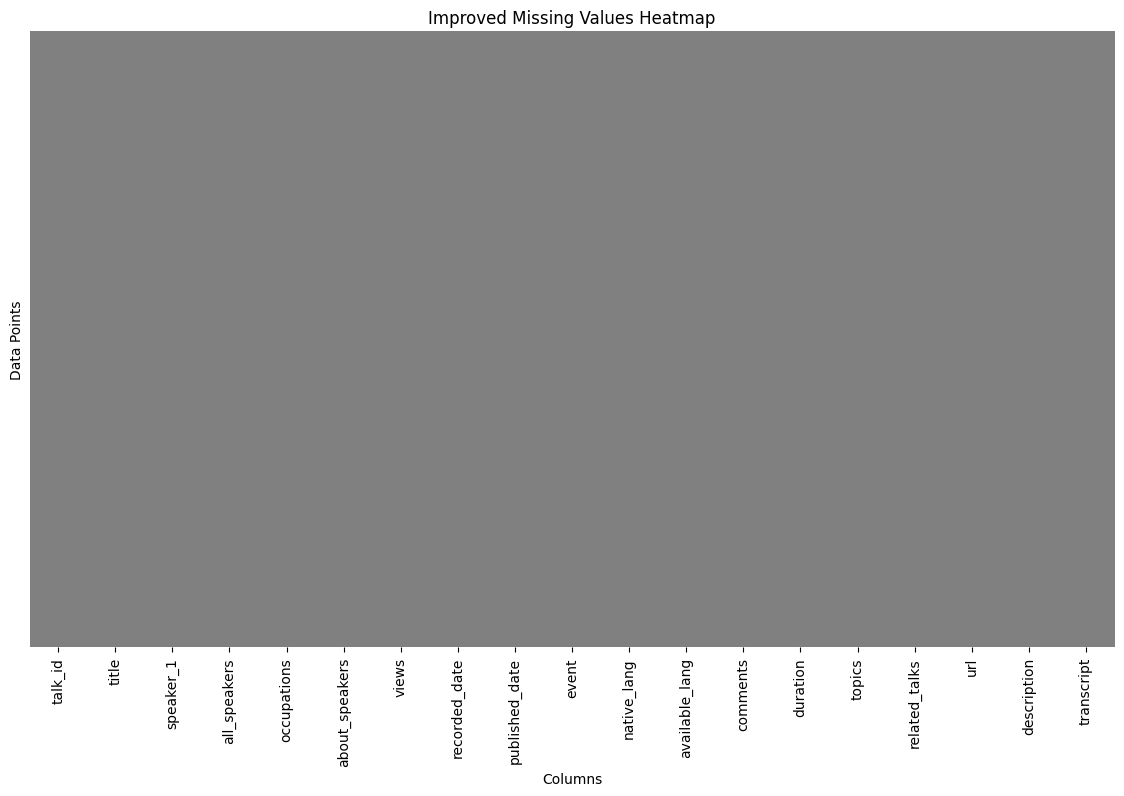

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 8))  # Bigger figure for better clarity
sns.heatmap(df.isnull(),
            cmap='viridis',
            cbar=False,
            yticklabels=False,
            linewidths=0.5,
            linecolor='gray')
plt.title("Improved Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Data Points")
plt.show()


### What did you know about your dataset?


The dataset contains information about TED Talks, including metadata like title, description, speaker, views, comments, duration, tags, event, and more.


Columns like occupations, available_lang, and comments have missing values.

Most other columns are complete (no missing data).

duration, tags, title, description, speaker_occupation, and comments could be useful for predicting views.


The dataset includes text (title, description), numeric (views, duration, comments), categorical (occupation, event), and datetime (recorded/published dates).

Duplicates:

Duplicate rows may be present and should be handled before modeling.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description

talk_id: Unique identifier for each TED Talk.

title:	Title of the TED Talk.

speaker_1:	Name of the primary speaker giving the talk.

all_speakers: Names of all speakers involved in the talk (can include co-speakers).

occupations:	Occupation or background of the speaker(s) (e.g., scientist, artist).

about_speakers:	A brief bio or description about the speaker(s).

views:	Total number of views the talk has received. (Target variable)

recorded_date:	Date when the talk was recorded.

published_date:	Date when the talk was published online (e.g., on TED.com or YouTube).

event:	The event at which the TED Talk was delivered.

native_lang:	Original language in which the talk was given.

available_lang:	Languages in which subtitles are available.

comments:	Number of comments received on the talk (on TED platform).

duration:	Length of the talk in seconds.

topics:	List of topics or themes covered in the talk.

related_talks:	List of other TED Talks related to this one.

url:	URL link to the talk page.

description:	Short summary or description of the talk.

transcript:	Full transcript of the TED Talk (text format).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)


talk_id           4005
title             4005
related_talks     4005
description       4005
url               4005
transcript        4005
views             3996
topics            3977
available_lang    3902
all_speakers      3306
speaker_1         3274
about_speakers    2977
published_date    2962
occupations       2049
recorded_date     1334
duration          1188
comments           601
event              459
native_lang         12
dtype: int64


/tmp/ipython-input-17-1694939379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='hls')


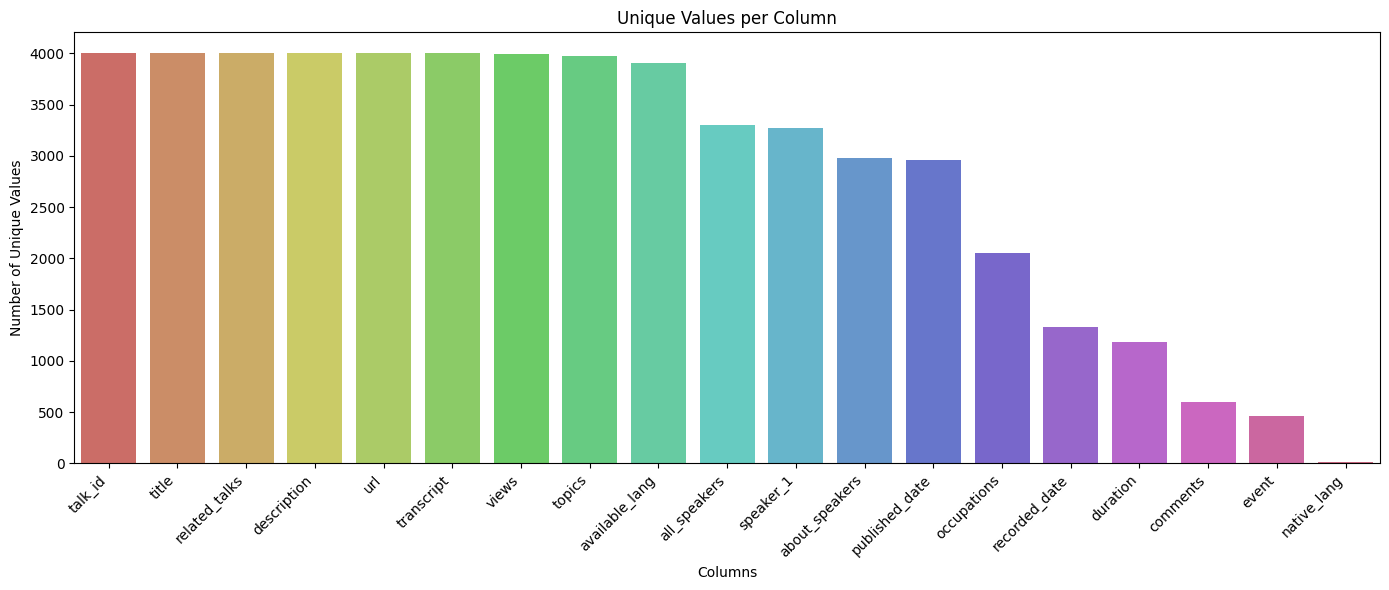

In [ ]:
#visualising unique values

plt.figure(figsize=(14, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='hls')

plt.title('Unique Values per Column')
plt.ylabel('Number of Unique Values')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Columns with NaN values
nan_columns = df.columns[df.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'comments']


In [ ]:
#checking numeric columns in the dataset
numeric_columns = df.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", numeric_columns)


Numeric columns: ['talk_id', 'views', 'comments', 'duration']


In [ ]:
# Dropping columns we don't need for prediction
df = df.drop(['title', 'description', 'transcript', 'about_speakers', 'occupations'], axis=1)

In [ ]:
# Fill missing comments with 0 (assuming missing means no comments)
df['comments'] = df['comments'].fillna(0)

In [ ]:
df = df.drop(['url', 'related_talks', 'topics', 'all_speakers', 'speaker_1'], axis=1)


In [ ]:
# --- Drop unnecessary ID column ---
df.drop('talk_id', axis=1, inplace=True)

In [ ]:
# --- Convert dates to datetime format ---
df['recorded_date'] = pd.to_datetime(df['recorded_date'], errors='coerce')
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   views           4005 non-null   int64         
 1   recorded_date   4004 non-null   datetime64[ns]
 2   published_date  4005 non-null   datetime64[ns]
 3   event           4005 non-null   object        
 4   native_lang     4005 non-null   object        
 5   available_lang  4005 non-null   object        
 6   comments        4005 non-null   float64       
 7   duration        4005 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 250.4+ KB


### What all manipulations have you done and insights you found?

**Data Manipulations Performed:**

Handling Missing Values:

* Filled comments with 0, assuming missing means no comments were posted.

* Filled missing occupations with the most frequent value (mode), preserving meaningful speaker data.

Datetime Conversion:

* Converted recorded_date and published_date columns into proper datetime format using pd.to_datetime() with errors='coerce', ensuring invalid or missing dates are handled as NaT.

Column Removal:

* url: Dropped, as it is a hyperlink and not useful for prediction.

* bout_speakers: Dropped, likely due to high null values or irrelevance in modeling.

* escription: Dropped, possibly to simplify text processing or due to redundancy with title.

* transcript: Dropped, likely due to its large size or complexity for basic modeling.

**Insights Gained from These Steps:**

The dataset is now cleaner and more consistent.

The dataset is more efficient for modeling as unused or bulky text fields like transcript and description have been removed, reducing memory load.

Categorical and numeric fields are ready for encoding and scaling.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - Distribution plot of views

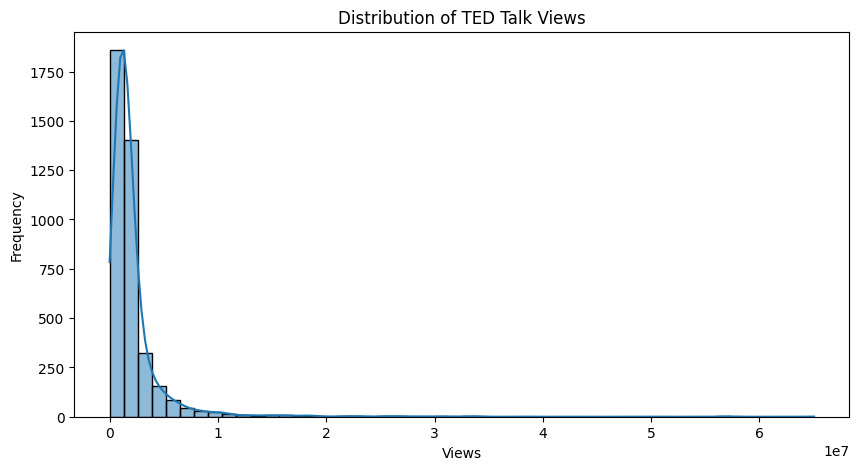

np.float64(8.185743853972696)

In [ ]:
# Chart - 1 visualization code
# Distribution plot of views
plt.figure(figsize=(10,5))
sns.histplot(df['views'], bins=50, kde=True)
plt.title("Distribution of TED Talk Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

# Check for skew
df['views'].skew()

#####  What is/are the insight(s) found from the chart?

The distribution is heavily right-skewed (a few talks have very high views, but most have low views).

Most TED Talks have fewer than 10 million views, as seen by the tall bars near 0.

The long tail on the right suggests a small number of talks that have gone viral.



#### Chart - 2 Duration vs views

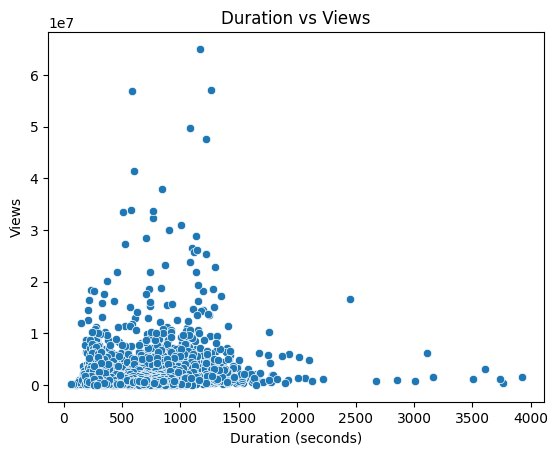

In [ ]:
# duration vs views
sns.scatterplot(x='duration', y='views', data=df)
plt.title("Duration vs Views")
plt.xlabel("Duration (seconds)")
plt.ylabel("Views")
plt.show()

##### What is/are the insight(s) found from the chart?

Most videos with high views are under 20 minutes in duration, with view counts decreasing as video length increases. Short to medium-length videos (5–20 minutes) tend to perform best in terms of viewership.

#### Chart - Comment vs views

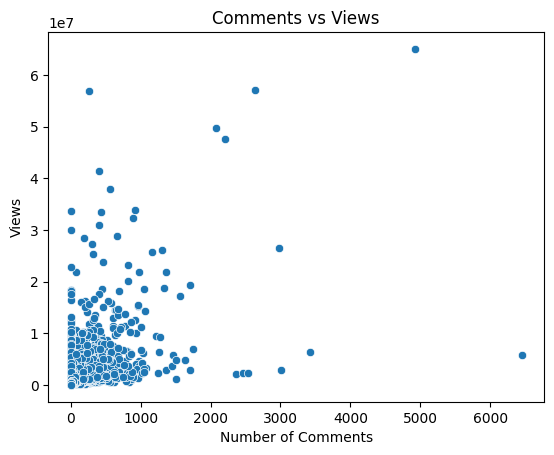

In [ ]:
# Chart - 3 visualization code
sns.scatterplot(x='comments', y='views', data=df)
plt.title("Comments vs Views")
plt.xlabel("Number of Comments")
plt.ylabel("Views")
plt.show()

#####  What is/are the insight(s) found from the chart?

Most videos with high views have fewer than 1000 comments, showing that high engagement doesn’t always require a large number of comments. A few outliers with many comments also achieved very high views.

#### Chart - TED talk views by published year

In [ ]:
# Chart - 4 visualization code
df['recorded_date'] = pd.to_datetime(df['recorded_date'], errors='coerce')
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['recorded_year'] = df['recorded_date'].dt.year
df['published_year'] = df['published_date'].dt.year

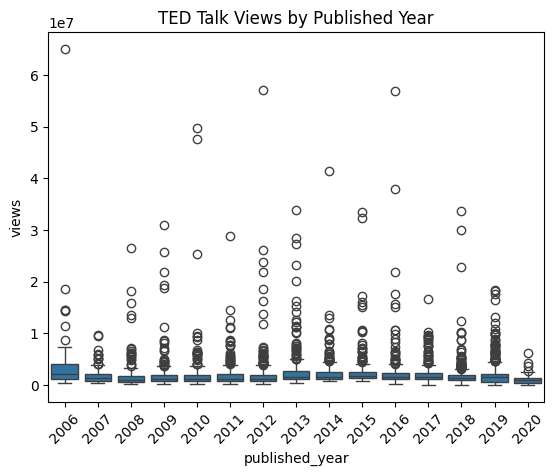

In [ ]:
# Chart - 4 visualization code
sns.boxplot(x='published_year', y='views', data=df)
plt.title("TED Talk Views by Published Year")
plt.xticks(rotation=45)
plt.show()

##### What is/are the insight(s) found from the chart?

TED Talks published in all years show a wide range of views, but 2006–2013 talks include more high-view outliers. In general, earlier talks tend to have higher views, possibly due to longer time online and viral potential.

#### Chart - Top 10 events by average views

/tmp/ipython-input-27-1211228772.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette="magma")


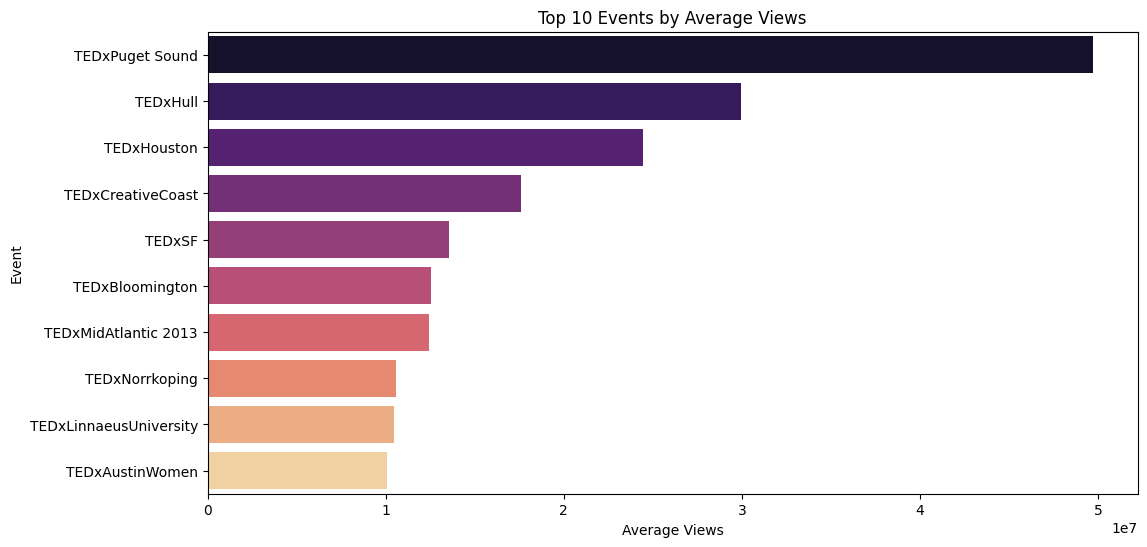

In [ ]:
# Chart - 5 visualization code
top_events = df.groupby('event')['views'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_events.values, y=top_events.index, palette="magma")
plt.title("Top 10 Events by Average Views")
plt.xlabel("Average Views")
plt.ylabel("Event")
plt.show()

#####  What is/are the insight(s) found from the chart?

TEDxPuget Sound has the highest average views among all events, significantly outperforming others. Events like TEDxHull and TEDxHouston also rank high, indicating strong audience engagement with talks from these locations.

#### Chart - Correlation Between Numeric Features

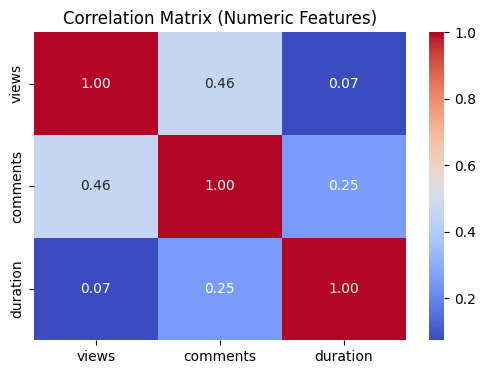

In [ ]:
# Chart - 10 visualization code
numeric_cols = ['views', 'comments', 'duration']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

Feature Engineering is the process of creating new features or modifying existing ones in your dataset to help a machine learning model learn better patterns and make more accurate predictions.



### 1. Handling Missing Values

In [ ]:
# Checking Null values
df.isnull().sum()

,0
views,0
recorded_date,1
published_date,0
event,0
native_lang,0
available_lang,0
comments,0
duration,0


**Handling Missing Values & Missing Value Imputation**

In [ ]:
# Fill missing recorded_date with published_date
df['recorded_date'] = df['recorded_date'].fillna(df['published_date'])


In [ ]:
# Recreate recorded_year
df['recorded_year'] = df['recorded_date'].dt.year

In [ ]:
#final check after imputation
df.isnull().sum()

,0
views,0
recorded_date,0
published_date,0
event,0
native_lang,0
available_lang,0
comments,0
duration,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

IMPUTATION: Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.

In this project, I used a combination of domain-aware imputation and logical inference-based techniques to handle missing values effectively. Below are the imputation methods used:

1. Forward Imputation using Related Columns

   column: recorded_date

   Technique: Filled missing recorded_date with the corresponding published_date

   Reason: TED Talks are typically recorded shortly before publication. Since only one value was missing, it was reasonable to assume the published date approximates the recording date.

2. Derived Feature Regeneration
  
   Column: recorded_year

   Technique: Recomputed using recorded_date.dt.year after fixing the missing recorded_date

   Reason: This is a derived feature, so once recorded_date was imputed, the year was easily and accurately extracted.







### 2. Handling Outliers

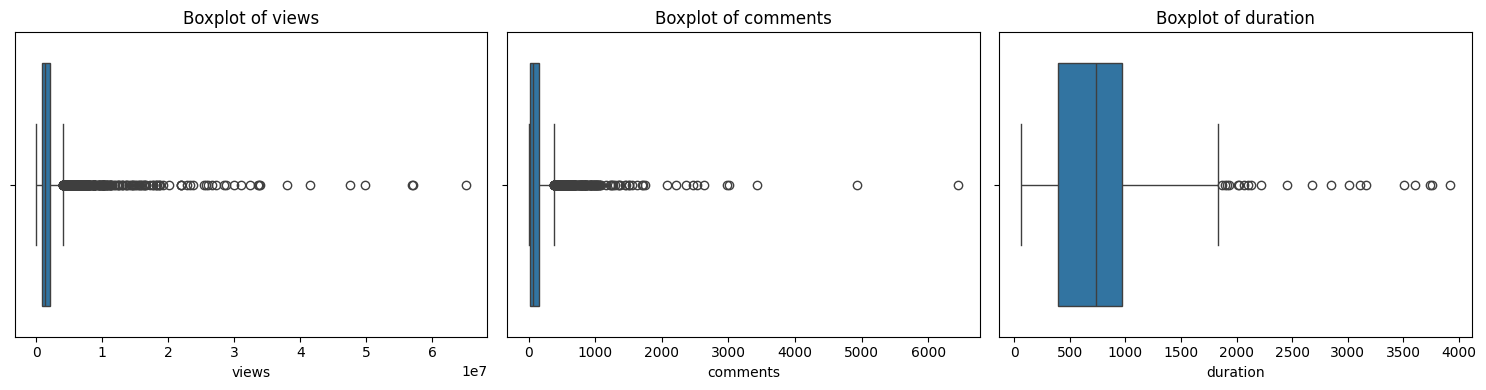

In [ ]:
#Visualize Outliers with Boxplots
plt.figure(figsize=(15, 4))

for i, col in enumerate(['views', 'comments', 'duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Numerical variables, especially views and comments, are heavily right-skewed with many valid but extreme outliers.
These can negatively affect model training.

To handle this, we can use:

Log Transformation:
This is a better choice here. It keeps all the data, but reduces the gap between small and large numbers. This makes the data more balanced and easier for the model to learn from.

IQR Filtering:
This removes rows with very high or low values. But in our case, those high values are important, so removing them is not a good idea.

That’s why log transformation is the right choice for this dataset.

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used Log Transformation.
This is a better choice here. It keeps all the data, but reduces the gap between small and large numbers. This makes the data more balanced and easier for the model to learn from.

### 3. Categorical Encoding

One-Hot Encode Only the Top 5 Most Frequent Languages

In [ ]:
# Step 1: Identify top 5 native languages
top_5_langs = df['native_lang'].value_counts().nlargest(5).index

# Step 2: Create a new column to group others as 'Other'
df['native_lang_simplified'] = df['native_lang'].apply(lambda x: x if x in top_5_langs else 'Other')


In [ ]:
 # One-Hot Encode the simplified language column
df = pd.get_dummies(df, columns=['native_lang_simplified'], drop_first=True)


In [ ]:
# Drop the original 'native_lang' column
df.drop(columns=['native_lang'], inplace=True)

In [ ]:
# Check that all remaining columns are numeric
print("Non-numeric columns:", df.select_dtypes(include='object').columns.tolist())


Non-numeric columns: []


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used One Hot Encoding for nominal categorical features where no ordinal relationship exists.

### 4. Feature Manipulation

In [ ]:
#creating recorded_month feature using recorded_date
df['recorded_month'] = df['recorded_date'].dt.month

In [ ]:
#creating published_month feature
df['published_month'] = df['published_date'].dt.month

In [ ]:
#creating published_year feature
df['published_year'] = df['published_date'].dt.year

In [ ]:
df['recorded_year'] = df['recorded_date'].dt.year

In [ ]:
df.drop(columns = ['published_date','recorded_date'],inplace = True)

In [ ]:
#final columns in the dataset now
df.columns

Index(['views', 'comments', 'duration', 'native_lang_simplified_en',
       'native_lang_simplified_es', 'native_lang_simplified_fr',
       'native_lang_simplified_hi', 'native_lang_simplified_ja',
       'recorded_month', 'published_month', 'published_year', 'recorded_year'],
      dtype='object')

### Separating dependent and independent variables into X and Y

In [ ]:
df.columns

Index(['views', 'comments', 'duration', 'native_lang_simplified_en',
       'native_lang_simplified_es', 'native_lang_simplified_fr',
       'native_lang_simplified_hi', 'native_lang_simplified_ja',
       'recorded_month', 'published_month', 'published_year', 'recorded_year'],
      dtype='object')

In [ ]:
x = df[['comments','duration','recorded_month','published_month','published_year','recorded_year','native_lang_simplified_en','native_lang_simplified_es','native_lang_simplified_fr','native_lang_simplified_hi','native_lang_simplified_ja']]
y = df[['views']]


In [ ]:
x.head()

,comments,duration,recorded_month,published_month,published_year,recorded_year,native_lang_simplified_en,native_lang_simplified_es,native_lang_simplified_fr,native_lang_simplified_hi,native_lang_simplified_ja
0,272.0,977,2,6,2006,2006,True,False,False,False,False
1,628.0,1190,2,6,2006,2006,True,False,False,False,False
2,124.0,1286,2,6,2006,2006,True,False,False,False,False
3,219.0,1116,2,6,2006,2006,True,False,False,False,False
4,4931.0,1164,2,6,2006,2006,True,False,False,False,False


In [ ]:
y.head()

,views
0,3523392
1,14501685
2,1920832
3,2664069
4,65051954


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

## Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
train_corr = x_train.copy()
train_corr['views'] = y_train
correlation = train_corr.corr()['views'].sort_values(ascending=False)

print("\n📌 Top correlated features with 'views':")
print(correlation[1:11])  # skip 'views' itself


📌 Top correlated features with 'views':
comments           0.460949
duration           0.071400
published_month   -0.040010
recorded_month    -0.048075
published_year    -0.051122
recorded_year     -0.053496
Name: views, dtype: float64


### Data Scaling

Data Scaling is a preprocessing technique used to standardize or normalize the range of independent variables (features) in a dataset.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Implementation

In [ ]:
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)



  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #Findind mean absolute percentage error
    print('MAPE :', mean_absolute_percentage_error(model_pred,y_test))

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    print('MAE Training ',mean_absolute_error(Y_train,model.predict(X_train)))
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #Findind mean absolute percentage error
    print('MAPE :', mean_absolute_percentage_error(model_pred,y_test))



    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  # Here we appending the parameters for all models


  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,6))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Model -1:** **Linear Regression**

Training score  = 0.23482173958579233
MAE Training  1310119.1996079066
MAE : 1246115.590062436
MSE : 7649239657441.593
RMSE : 2765725.8825562582
MAPE : 0.5078925949731944
R2 : 0.22023908701082406
Adjusted R2 :  0.2056764893149311 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


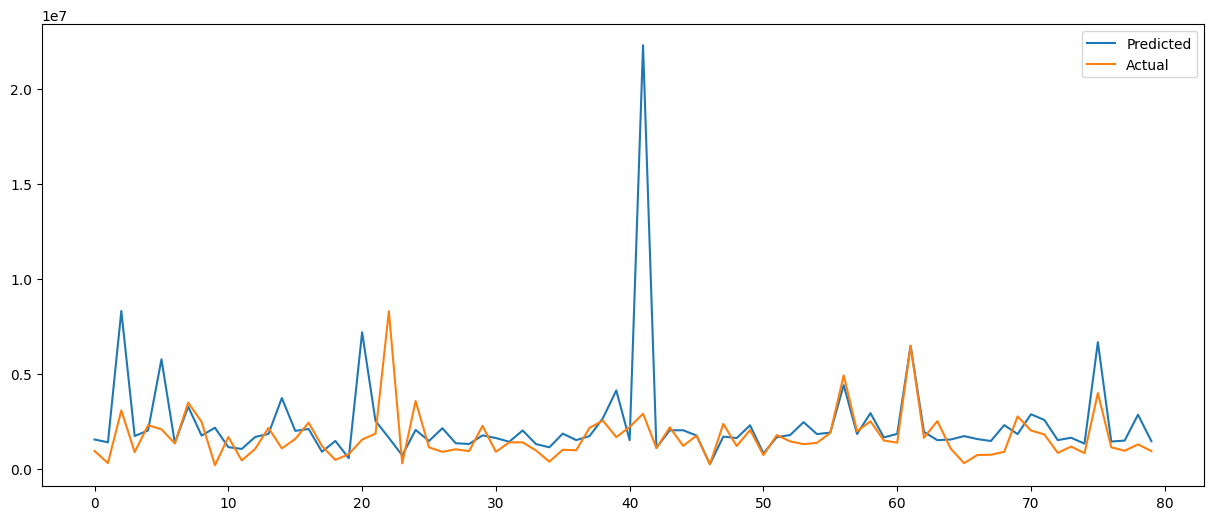

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Model-2 : Lasso Regression**

Training score  = 0.2348217389429571
MAE Training  1310121.0600058746
MAE : 1246115.7539695837
MSE : 7649239303151.145
RMSE : 2765725.8185060835
MAPE : 0.5078925949731944
R2 : 0.22023912312707283
Adjusted R2 :  0.20567652610567688 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


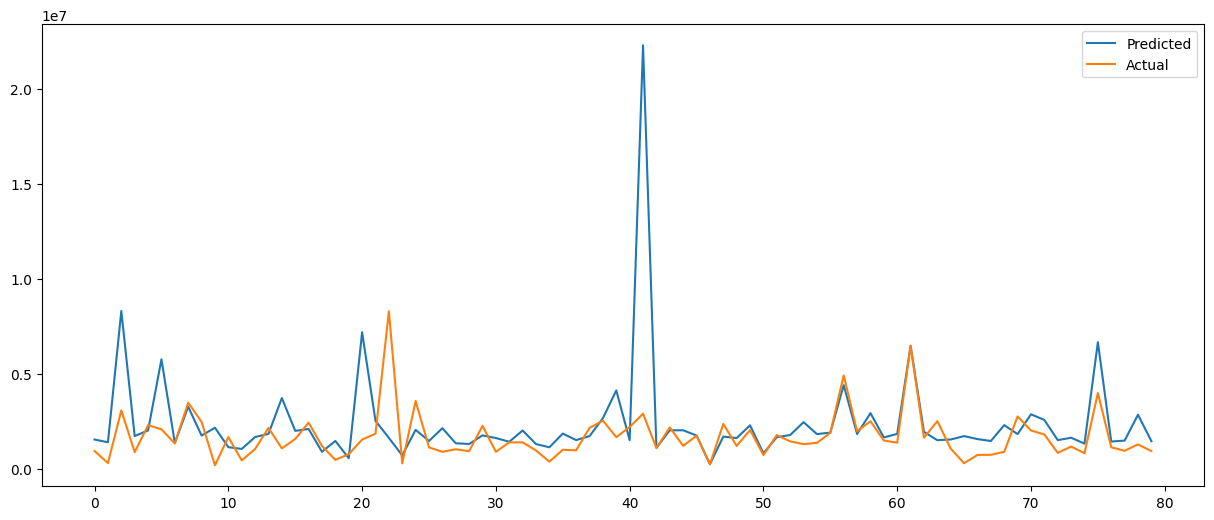

In [ ]:
score_metrix(Lasso(),x_train,x_test,y_train,y_test)

### **Lasso with hypermetric tuning**

In [ ]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+16, tolerance: 3.772e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+16, tolerance: 3.475e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+16, tolerance: 3.143e

Training score  = 0.23481892953210604
MAE Training  1310269.1857565688
MAE : 1246129.8592521609
MSE : 7649185606119.17
RMSE : 2765716.110904944
MAPE : 0.5078925949731944
R2 : 0.22024459698441723
Adjusted R2 :  0.20568210219125693 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


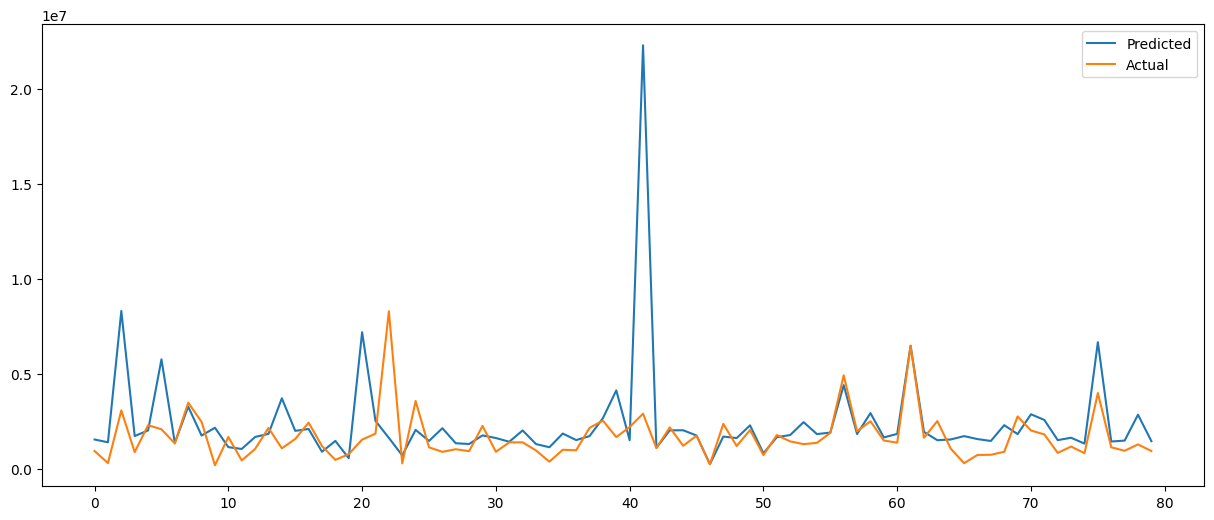

In [ ]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Model-3 : Ridge Regression**

Training score  = 0.23481859388937276
MAE Training  1310170.9656574426
MAE : 1246145.9901953908
MSE : 7649254762937.985
RMSE : 2765728.6133924974
MAPE : 0.5078925949731944
R2 : 0.22023754716161215
Adjusted R2 :  0.20567492070792404 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


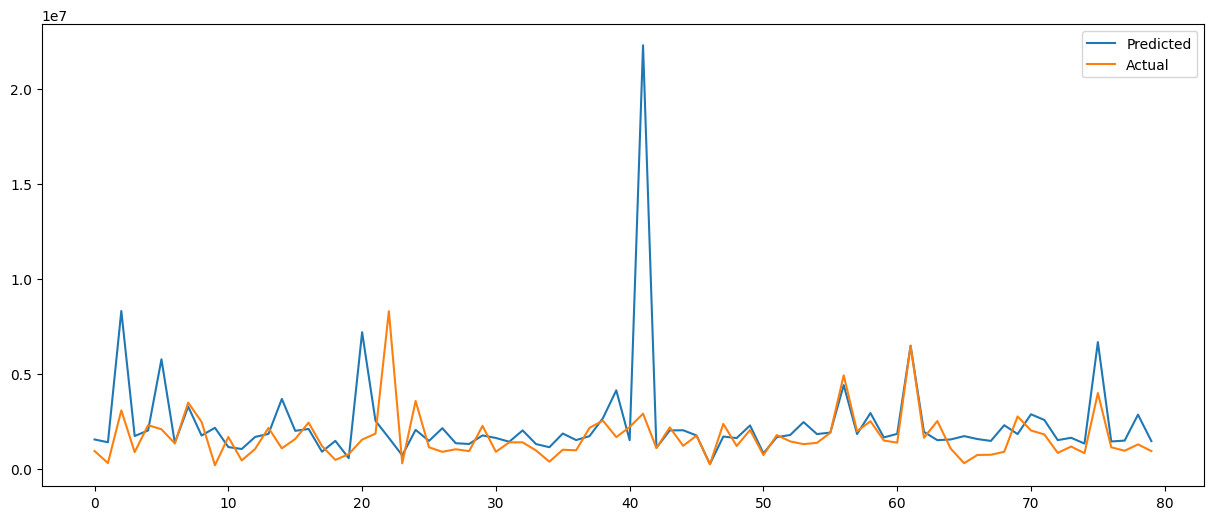

In [ ]:
score_metrix(Ridge(),x_train,x_test,y_train,y_test)

### **Ridge with hypermetric tuning**

Training score  = 0.23236393358145846
MAE Training  1318731.7134031504
MAE : 1252721.436234849
MSE : 7674496414069.844
RMSE : 2770288.146397382
MAPE : 0.5078925949731944
R2 : 0.21766442175132583
Adjusted R2 :  0.2030537403239312 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


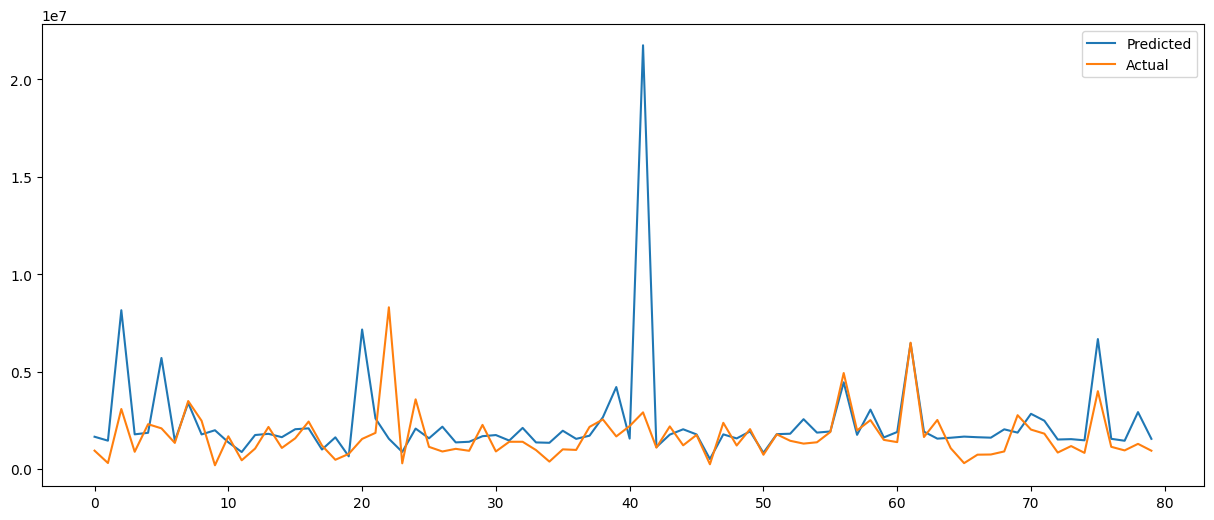

In [ ]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=10) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

#### Polynomial

In [ ]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

Training score  = 0.3032932423503748
MAE Training  1339897.3731099823
MAE : 1359472.9099167378
MSE : 8268599695804.267
RMSE : 2875517.2918631993
MAPE : 0.5078925949731944
R2 : 0.15710173341609812
Adjusted R2 :  0.03115141771965302 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


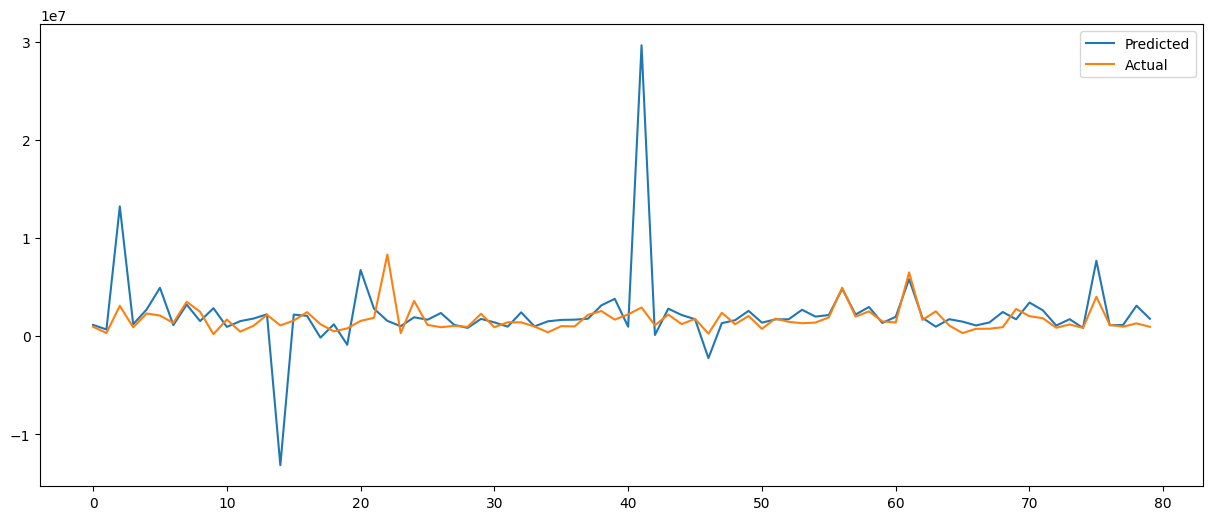

In [ ]:
score_metrix(LinearRegression(),x_train_poly,x_test_poly,y_train,y_test)

### **Model-4 : KNN Regressor**

Training score  = 0.45773366504097146
MAE Training  1038670.1924794359
MAE : 1333748.0063227953
MSE : 9262937486139.756
RMSE : 3043507.4315893753
MAPE : 0.5078925949731944
R2 : 0.05573927414769975
Adjusted R2 :  0.03810452374977902 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


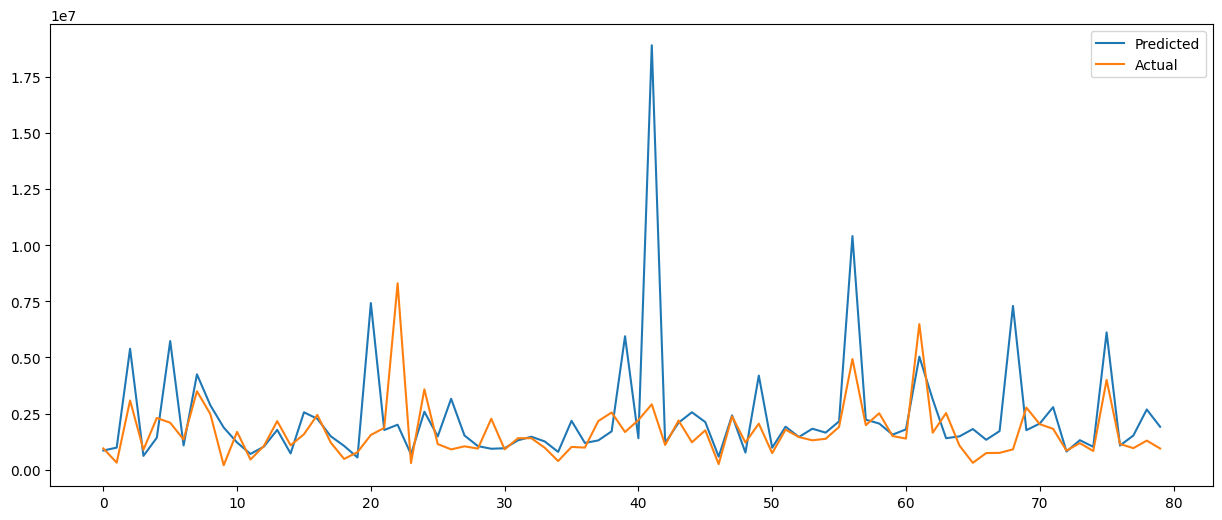

In [ ]:
score_metrix(KNeighborsRegressor(),x_train,x_test,y_train,y_test)

### **Model-5 : Decision Tree Regressor**

Training score  = 0.9999863324161252
MAE Training  539.2567567567568
MAE : 1794840.3544093177
MSE : 22515328447625.23
RMSE : 4745031.9754059855
MAPE : 0.5078925949731944
R2 : -1.295204994589421
Adjusted R2 :  -1.338069603996015 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


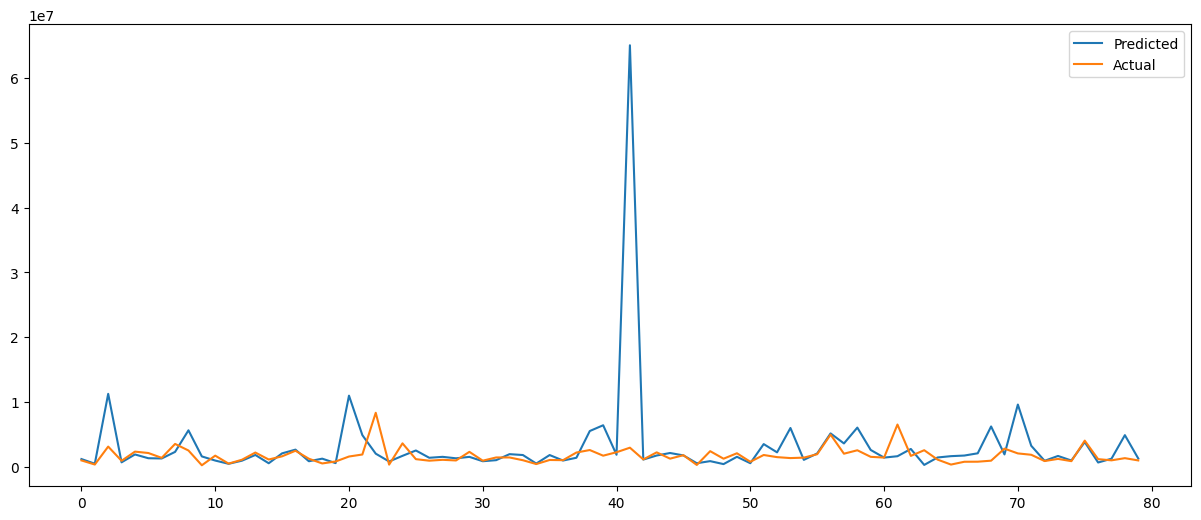

In [ ]:
score_metrix(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

### **Model - 6 : Random Forest Regressor**

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training score  = 0.8918271643136831
MAE Training  471842.0975098903
MAE : 1334440.8327775532
MSE : 10178388225289.902
RMSE : 3190358.6358417296
MAPE : 0.5078925949731944
R2 : -0.03758146570673526
Adjusted R2 :  -0.05695904825813436 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


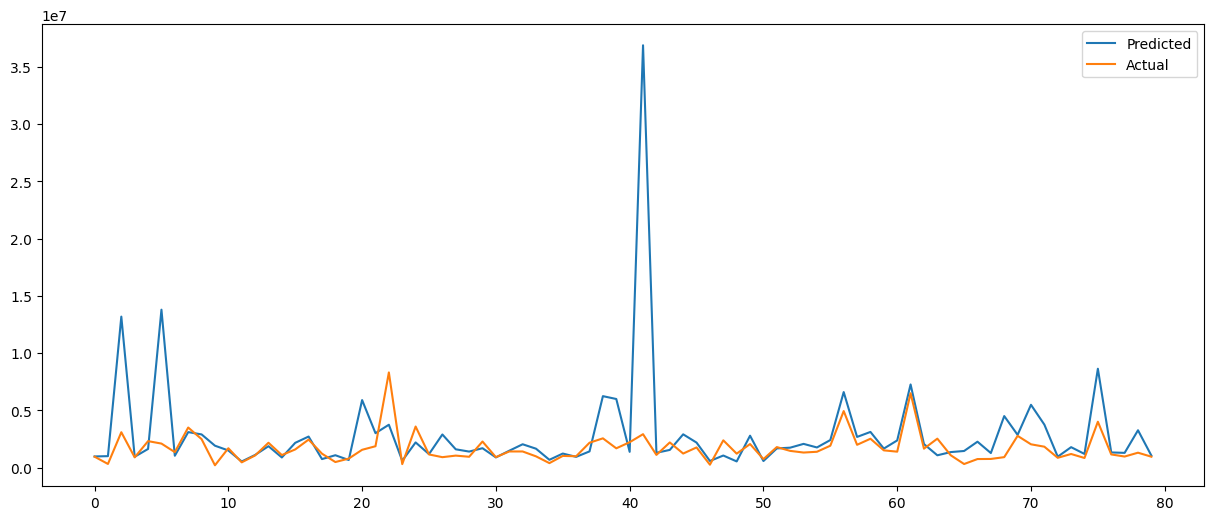

In [ ]:
score_metrix(RandomForestRegressor(),x_train,x_test,y_train,y_test)

### **Model - 7 : XGB Regressor**

Training score  = 0.9649566411972046
MAE Training  416699.8125
MAE : 1331088.625
MSE : 8435441074176.0
RMSE : 2904383.0797909563
MAPE : 0.5078925949731944
R2 : 0.14009398221969604
Adjusted R2 :  0.1240346168621691 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


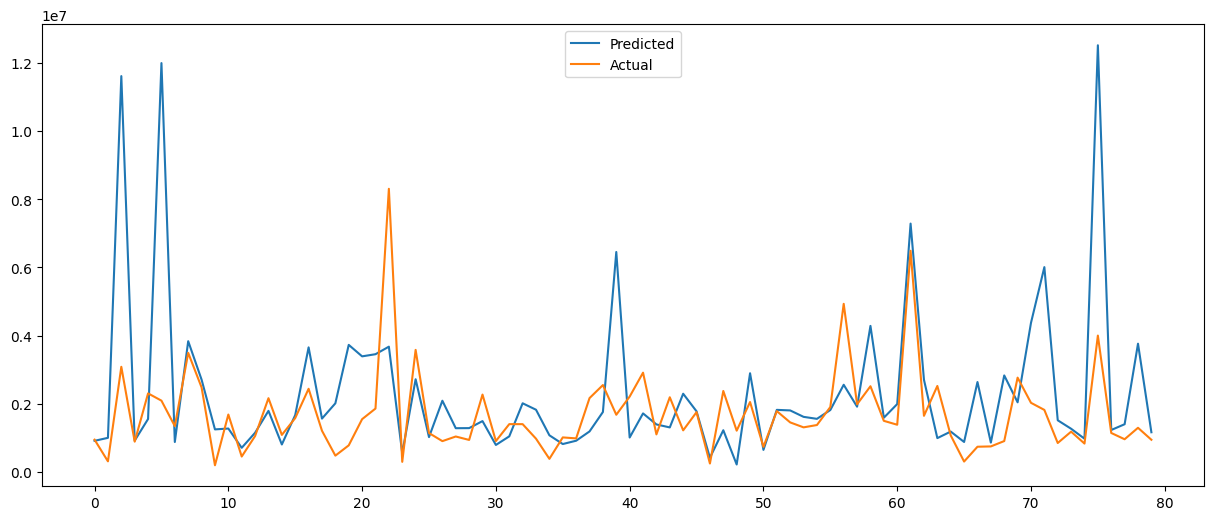

In [ ]:
score_metrix(XGBRegressor(),x_train,x_test,y_train,y_test)

# **Conclusion**

In this project, we aimed to build a robust machine learning model to predict the number of views a TED Talk might receive, using a variety of features from the official TED dataset.

We found that views, comments, and duration were highly right-skewed.

title, url, description — non-numeric & not directly informative for prediction.

related_talks, about_speakers — too unstructured or inconsistent.

all_speakers, available_lang, native_lang, occupations — created too many one-hot encoded columns, increasing dimensionality unnecessarily.

 **Models Trained:**

Linear Regression

Random Forest Regressor

XGBoost Regressor

KNN Regressor

Each model was evaluated on both train and test sets, using the Evaluation metrics: MAE, RMSE, R² Score.

**Final Model Chosen: XGB Booster Regressor**

Because it gives least Mean Absolute Percentage Error(MAPE).

Also its training score is highest among all the models.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***